In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

# load the threshold data file & select the drought period of interest
PmEQ_events_file = 'sm_droughts/PmEQ_events_*.nc'
events_file = 'sm_droughts/events_*.nc'
sm_events_file = 'sm_droughts/sm_events_*.nc'

ds_PmEQ = xr.open_mfdataset(main_dir + PmEQ_events_file)
ds_events = xr.open_mfdataset(main_dir + events_file)
ds_sm = xr.open_mfdataset(main_dir + sm_events_file)

drght_time_slice = slice('2017-01-01', '2020-03-31')
drght_name = 'recent_drght'
drght_dir = 'GLM_results_' + drght_name + '/validation/'

# select the thresholds for the time periods of the drought
da_PmEQ = ds_PmEQ['PminusEQ'].sel(time = drght_time_slice)
da_events = ds_events['sm_drought'].sel(time = drght_time_slice)
da_sm = ds_sm['sm_deficit'].sel(time = drght_time_slice)

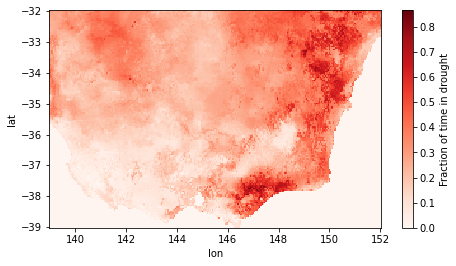

In [3]:
# which are the grid points that have been in drought

lat_size = -32-(-39)
lon_size = 152-139
aspect = lon_size/lat_size

frac_in_drought = (da_events.sum('time')/len(da_events.time)).rename('Fraction of time in drought')
frac_in_drought.plot(cmap = "Reds", aspect = aspect, size = 4)

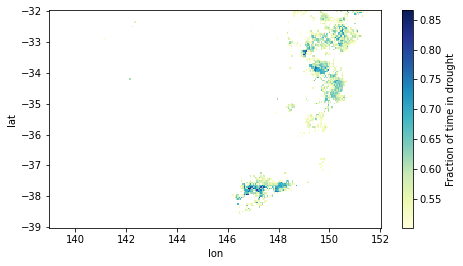

In [19]:
frac_in_drought.where(frac_in_drought>0.5).plot(cmap = "YlGnBu", aspect = aspect, size = 4)

In [36]:
lat_pt = -33.75
lon_pt = 149.5
frac_in_drought.sel(lat = lat_pt, lon = lon_pt).values

array(0.60455312)

In [4]:
# selected points: 

lat_pt = -37.75  # 0.827
lon_pt = 147     

# lat_pt = -37.5   # 0.513
# lon_pt = 148

# lat_pt = -34     # 0.557
# lon_pt = 150

# lat_pt = -33.75  # 0.604
# lon_pt = 149.5

# lat_pt = -37
# lon_pt = 148

sm_pt = da_sm.sel(lat = lat_pt, lon = lon_pt)
PmEQ_pt = da_PmEQ.sel(lat = lat_pt, lon = lon_pt)
events_pt = da_events.sel(lat = lat_pt, lon = lon_pt)

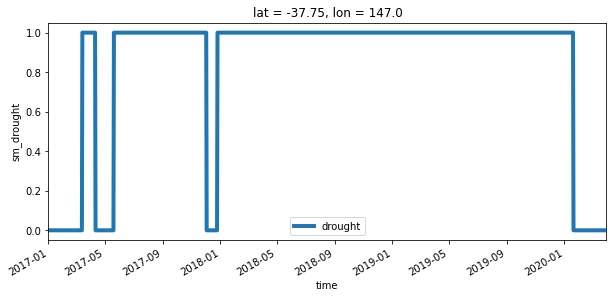

In [52]:
import matplotlib.pyplot as plt

fig_dir = 'figures/drought_events/validation/'
fig_suffix = '_lat' + str(lat_pt) + '_lon' + str(lon_pt)

xlim = (min(events_pt.time.values), max(events_pt.time.values))

events_pt.plot(size=4, aspect=2.5, linewidth=4, label = "drought", xlim=xlim)
plt.legend()
plt.savefig(fig_dir + 'drought_event_' + fig_suffix + '.png')

In [45]:
! ls figures/drought_events/validation/

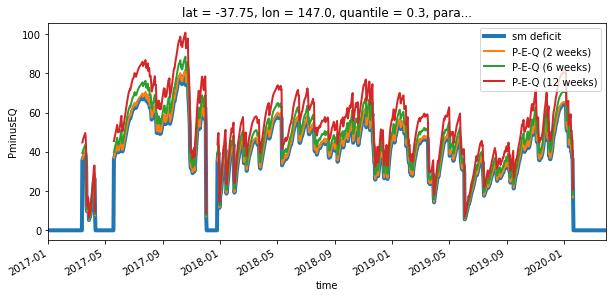

In [53]:
sm_pt_forplot = xr.where(sm_pt>0, sm_pt, 0)
sm_pt_forplot.plot(size=4, aspect=2.5, linewidth=4, label = "sm deficit", xlim=xlim)
PmEQ_pt.sel(timescale = 2).plot(linewidth=2, label = "P-E-Q (2 weeks)")
PmEQ_pt.sel(timescale = 6).plot(linewidth=2, label = "P-E-Q (6 weeks)")
PmEQ_pt.sel(timescale = 12).plot(linewidth=2, label = "P-E-Q (12 weeks)")
plt.legend()
plt.savefig(fig_dir + 'deficits_' + fig_suffix + '.png')

In [3]:
# get probabilities estimated from the modelling

# time_slice_temp = slice('2017-01-01', '2018-07-31')

ds_glm_list = []
ts_list = [2, 6, 12]
glm_dir = main_dir + 'GLM_results_' + drght_name + '/' #PminusEQ_week' + str(ts) + '/' #by_day/'
glm_file = 'PminusEQ_results_weeks_2_6_12.nc'
ds_glm = xr.open_dataset(glm_dir + glm_file) #, combine = "nested", concat_dim = "time")
ds_glm

# for ts in ts_list:
    
#     glm_files = 'GLM_results.nc'
#     ds_glm = xr.open_mfdataset(glm_dir + glm_files, combine = "nested", concat_dim = "time")
#     ds_glm_sel = ds_glm.sel(time = time_slice_temp)
#     ds_glm_list.append(ds_glm_sel)
#     del ds_glm, ds_glm_sel

<xarray.Dataset>
Dimensions:          (lat: 141, lon: 261, time: 1186, timescale: 3, glm_parameter: 3)
Coordinates:
  * lat              (lat) float32 -32.0 -32.05 -32.1 ... -38.9 -38.95 -39.0
  * lon              (lon) float32 139.0 139.1 139.1 139.1 ... 151.9 151.9 152.0
    quantile         float64 ...
  * time             (time) datetime64[ns] 2017-01-01 2017-01-02 ... 2020-03-31
    dayofyear        (time) int64 ...
    parameter        object ...
  * timescale        (timescale) int64 2 6 12
  * glm_parameter    (glm_parameter) object 'Intercept' 'soi' 'dmi'
Data variables:
    glm_probability  (timescale, time, lat, lon) float64 ...
    glm_params       (timescale, time, lat, lon, glm_parameter) float64 ...
    glm_pvalues      (timescale, time, lat, lon, glm_parameter) float64 ...
    glm_aic          (timescale, time, lat, lon) float64 ...
    soi              (timescale, time) float64 ...
    dmi              (timescale, time) float64 ...

In [15]:
# selected points: 

# lat_pt = -37.75  # 0.827
# lon_pt = 147     

# lat_pt = -37.5   # 0.513
# lon_pt = 148

# lat_pt = -34     # 0.557
# lon_pt = 150

lat_pt = -33.75  # 0.604
lon_pt = 149.5

# lat_pt = -37
# lon_pt = 148

prob_pt = ds_glm['glm_probability'].sel(lat = lat_pt, lon = lon_pt)

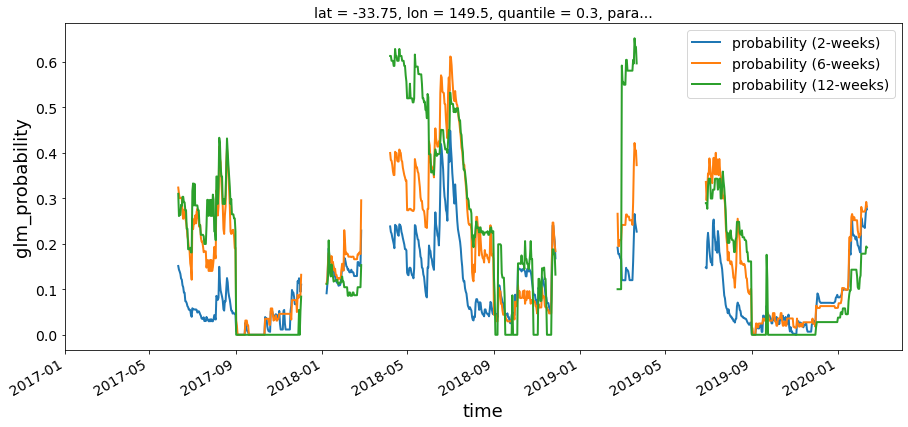

In [16]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

xlim = (min(prob_pt.time.values), max(prob_pt.time.values))

prob_pt.sel(timescale=2).plot(size=6, aspect=2.5, linewidth=2, label = "probability (2-weeks)", xlim = xlim)
prob_pt.sel(timescale=6).plot(linewidth=2, label = "probability (6-weeks)")
prob_pt.sel(timescale=12).plot(linewidth=2, label = "probability (12-weeks)")
plt.legend()
fig_dir = 'figures/drought_events/validation/'
fig_suffix = '_lat' + str(lat_pt) + '_lon' + str(lon_pt)
plt.savefig(fig_dir + 'estimated_prob_' + fig_suffix + '.png')

In [31]:
min(prob_pt.time.values)

numpy.datetime64('2017-01-01T00:00:00.000000000')

### Crude validation of the estimated probabilities

In [1]:
%who

Interactive namespace is empty.


In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import os
from functools import reduce

main_dir = '/g/data/w97/ad9701/p_prob_analysis/temp_files/'

drght_time_slice = slice('2017-01-01', '2020-03-31')
drght_name = 'recent_drght'
drght_dir = 'GLM_results_' + drght_name + '/validation/'
timescale = [2, 6, 12]

# load the event data files
PmEQ_events_file = 'sm_droughts/PmEQ_events_*.nc'
events_file = 'sm_droughts/events_*.nc'
sm_events_file = 'sm_droughts/sm_events_*.nc'
ds_PmEQ = xr.open_mfdataset(main_dir + PmEQ_events_file)
ds_events = xr.open_mfdataset(main_dir + events_file)
ds_sm = xr.open_mfdataset(main_dir + sm_events_file)

# get the sst predictors
sst_dir = '/g/data/w97/ad9701/p_prob_analysis/sst_data/'
pNames = ['soi', 'sami', 'dmi', 'nino34_anom', 'nino4_anom']
pFiles = ['soi_monthly.nc', 'newsam.1957.2021.nc', 'dmi.had.long.data.nc', 'nino34.long.anom.data.nc', 'nino4.long.anom.data.nc']
for p in np.arange(len(pNames)):
    ds_temp = xr.open_dataset(sst_dir + pFiles[p])
    if (p > 0):
        ds_sst[pNames[p]] = ds_temp[pNames[p]]
    else:
        ds_sst = ds_temp
    del ds_temp
    
# sst data arrays corresponding to the daily drought events file
sm_time_bymon = np.array(pd.to_datetime(ds_sm.time).to_period('M').to_timestamp().floor('D'))
da_soi = ds_sst['soi'].sel(time = sm_time_bymon)
da_dmi = ds_sst['dmi'].sel(time = sm_time_bymon)
# assign daily times to the sst data instead of the monthly time
da_soi = da_soi.assign_coords({'time':ds_sm.time.values})
da_dmi = da_dmi.assign_coords({'time':ds_sm.time.values})

# group sst data into bins to assess similarity for any drought day
soi_grp = da_soi.groupby_bins(da_soi, bins = 5)
dmi_grp = da_dmi.groupby_bins(da_dmi, bins = 5)
soi_intervals = [i for i, j in soi_grp]
dmi_intervals = [i for i, j in dmi_grp]

In [14]:
# # get probabilities estimated from the modelling
# # time_slice_temp = slice('2017-01-01', '2019-12-31')  # using the shorter time as calculation is in progress; otherwise no need for a time subset here
# ds_glm_list = []
# for ts in timescale:
#     glm_dir = main_dir + 'GLM_results_' + drght_name + '/PminusEQ_week' + str(ts) + '/by_day/'
#     glm_files = 'GLM_results_*.nc'
#     ds_glm = xr.open_mfdataset(glm_dir + glm_files, combine = "nested", concat_dim = "time")
#     # ds_glm_sel = ds_glm.sel(time = time_slice_temp)
#     ds_glm_list.append(ds_glm)
#     del ds_glm#, ds_glm_sel
# ds_glm = xr.concat(ds_glm_list, 'timescale')

# # save ds_glm
# out_file = main_dir + 'GLM_results_' + drght_name + '/PminusEQ_results_weeks_' + '_'.join([str(x) for x in timescale]) + '.nc'
# ds_glm.to_netcdf(out_file)

glm_results_file = main_dir + 'GLM_results_' + drght_name + '/PminusEQ_results_weeks_' + '_'.join([str(x) for x in timescale]) + '.nc'
ds_glm = xr.open_dataset(glm_results_file)

In [ ]:
# select a spatial point and group soil moisture 

lat_pt = -37.75  # 0.827 (frac of time spent in drought)
lon_pt = 147     

# lat_pt = -37.5   # 0.513
# lon_pt = 148

# lat_pt = -34     # 0.557
# lon_pt = 150

# lat_pt = -33.75  # 0.604
# lon_pt = 149.5

# lat_pt = -37
# lon_pt = 148

# subset sm and get sst predictors at selected point
da_sm_pt = ds_sm['sm_deficit'].sel(lat = lat_pt, lon = lon_pt)
sm_pt_grp = da_sm_pt.groupby_bins(da_sm_pt, bins = 3)
sm_intervals = [i for i, j in sm_pt_grp]

# datasets corresponding to the selected specific drought event at that point
da_sm_pt_drght = ds_sm['sm_deficit'].sel(lat = lat_pt, lon = lon_pt, time = drght_time_slice)
drght_time_bymon = np.array(pd.to_datetime(da_sm_pt_drght.time).to_period('M').to_timestamp().floor('D'))
da_soi_drght = ds_sst['soi'].sel(time = sm_time_bymon)
da_dmi_drght = ds_sst['dmi'].sel(time = sm_time_bymon)

# initialise output objects
drght_hist_break_prob = []
drght_hist_no_events = []
drght_hist_break_prob_distinct = []
drght_hist_no_events_distinct = []
for i in range(len(timescale)):
    drght_hist_break_prob.append([])
    drght_hist_no_events.append([])
    drght_hist_break_prob_distinct.append([])
    drght_hist_no_events_distinct.append([])

# work with the first drought day and extend to all drought days later
for i_day in range(len(da_sm_pt_drght.time)):
    print("Working on day ", str(iday))
    # i_day = 80    # for iday in range(len(da_sm_pt_drght.time)):
    day_deficit = da_sm_pt_drght[i_day]
    day_soi = da_soi_drght[i_day]
    day_dmi = da_dmi_drght[i_day]
    seas = da_sm_pt_drght[i_day]['time.season'].values

    # if the point is in drought on i_day
    if (~np.isnan(day_deficit).values):
        # which bin does sm and predictors fall into?
        sm_grp_ind = np.array([day_deficit in x for x in sm_intervals]).nonzero()[0][0]
        soi_grp_ind = np.array([day_soi in x for x in soi_intervals]).nonzero()[0][0]
        dmi_grp_ind = np.array([day_dmi in x for x in dmi_intervals]).nonzero()[0][0]

        # get days satisfying all three similarity criteria from the full record
        similar_sm_time = sm_pt_grp[sm_intervals[sm_grp_ind]].time#.values
        similar_soi_time = soi_grp[soi_intervals[soi_grp_ind]].time#.values
        similar_dmi_time = dmi_grp[dmi_intervals[dmi_grp_ind]].time#.values
        similar_time = reduce(np.intersect1d, (similar_sm_time, similar_soi_time, similar_dmi_time))

        # get similar drought days from the full record
        events_pt = ds_events['sm_drought'].sel(lat = lat_pt, lon = lon_pt)
        events_pt_sel = events_pt.sel(time = similar_time)
        events_pt_sel_grp = events_pt_sel.groupby(events_pt_sel['time.season'])
        events_pt_sel_seas = events_pt_sel_grp[str(seas)]

        # calculate the proportion of times the historical droughts ended
        # 1. using all identified days
        for its in range(len(timescale)):
            nWeekdiff = np.timedelta64((7*timescale[its]), 'D')
            ts_time = events_pt_sel_seas.time + nWeekdiff
            events_pt_ts_sel = events_pt.sel(time = ts_time)
            break_prob = events_pt_ts_sel.sum().values/len(events_pt_ts_sel.values)
            drght_hist_break_prob[its].append(break_prob)
            drght_hist_no_events[its].append(len(events_pt_ts_sel.values))
            # print(str(nWeek) + ' , prob = ' + str(break_prob))

        # 2. using distinct droughts from the identified record. discard days in the same drought run.
        distinct_days = [0]   # counting the first day as a distinct day
        time_diff = np.diff(events_pt_sel_seas.time.values.astype('datetime64[D]'))
        distinct_days.extend(np.where(time_diff > np.timedelta64(1, 'D'))[0].tolist())  # adding other distinct days
        for its in range(len(timescale)):
            nWeekdiff = np.timedelta64((7*timescale[its]), 'D')
            ts_time = events_pt_sel_seas.time[distinct_days] + nWeekdiff
            events_pt_ts_sel = events_pt.sel(time = ts_time)
            break_prob = events_pt_ts_sel.sum().values/len(events_pt_ts_sel.values)
            drght_hist_break_prob_distinct[its].append(break_prob)
            drght_hist_no_events_distinct[its].append(len(events_pt_ts_sel.values))
    else:
        for its in range(len(timescale)):
            drght_hist_break_prob[its].append(np.nan)
            drght_hist_no_events[its].append(np.nan)
            drght_hist_break_prob_distinct[its].append(np.nan)
            drght_hist_no_events_distinct[its].append(np.nan)

Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on day  0
Working on

In [ ]:
# save the results in a dataset
ds_all_prob = xr.concat([pd.Series(x, index = da_sm_pt_drght.time).to_xarray() for x in drght_hist_break_prob], {'timescale': timescale}).rename('hist_break_prob').to_dataset()
ds_all_prob.assign({'lat': pt_lat, 'lon': pt_lon})
ds_all_prob['hist_events'] = xr.concat([pd.Series(x, index = da_sm_pt_drght.time).to_xarray() for x in drght_hist_no_events], {'timescale': timescale})
ds_all_prob['hist_break_prob_distinct'] = xr.concat([pd.Series(x, index = da_sm_pt_drght.time).to_xarray() for x in drght_hist_break_prob_distinct], {'timescale': timescale})
ds_all_prob['hist_events_distinct'] = xr.concat([pd.Series(x, index = da_sm_pt_drght.time).to_xarray() for x in drght_hist_break_no_events_distinct], {'timescale': timescale})
ds_all_prob

In [186]:
ds_glm_pt = ds_glm.sel(lat = lat_pt, lon = lon_pt)
da_glm_break_prob = ds_glm_pt['glm_probability']
da_glm_break_prob
# for ts in timescale:
#     ds_glm_pt_ts = ds_glm_pt.sel(timescale = ts)
#     break_prob = ds_glm_pt_ts['glm_probability'].values.tolist()
#     drght_glm_break_prob.append(break_prob)

2 , prob = 0.07817335494650036
6 , prob = 0.22555678989107436
12 , prob = 0.4550005934300934


In [ ]:
ds_all_prob['glm_break_prob'] = da_glm_break_prob

In [ ]:
# save results
val_file = drght_dir + '/' + drght_name + '_crude_validation_lat' + str(lat) + '_lon' + str(lon) + '.nc'
ds_all_prob.to_netcdf(val_file)

#### Scratch Space

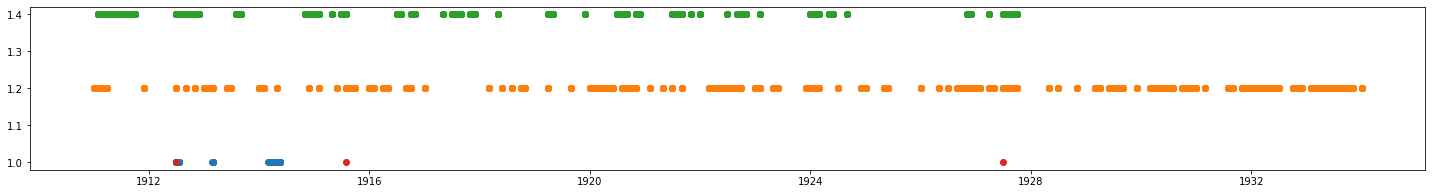

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25, 3))

xlim = (min(da_sm_pt.time.values), max(da_sm_pt.time.values))
xx = similar_sm_time.values[0:100]
ax.scatter(xx, np.repeat(1, len(xx)))
xx = similar_soi_time.values[0:4000]
ax.scatter(xx, np.repeat(1.2, len(xx)))
xx = similar_dmi_time.values[0:2000]
ax.scatter(xx, np.repeat(1.4, len(xx)))
xx = similar_time[0:3]
ax.scatter(xx, np.repeat(1, len(xx)))
#ax.set_xlim(xlim)

In [27]:
if (~np.isnan(day_deficit).values):
    print('yes')

yes


(array([   60.,   277.,  1916.,  7331., 14035., 11137.,  3709.,  1346.,
          306.,    61.]),
 array([-1.461 , -1.1747, -0.8884, -0.6021, -0.3158, -0.0295,  0.2568,
         0.5431,  0.8294,  1.1157,  1.402 ]),
 <BarContainer object of 10 artists>)

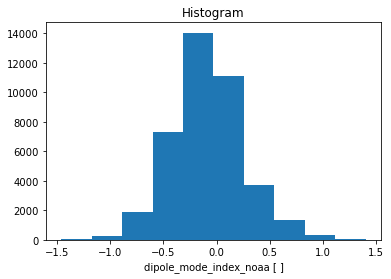

In [16]:
da_dmi.plot.hist()

(array([ 159.,  470.,  733., 1005., 1107., 1281.,  859.,  441.,  109.,
          37.]),
 array([7.85827637e-03, 8.04212295e+00, 1.60763876e+01, 2.41106523e+01,
        3.21449170e+01, 4.01791816e+01, 4.82134463e+01, 5.62477110e+01,
        6.42819756e+01, 7.23162403e+01, 8.03505050e+01]),
 <BarContainer object of 10 artists>)

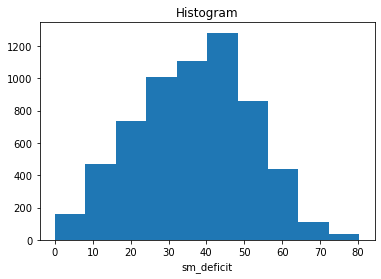

In [21]:
da_sm_pt.plot.hist()